# AI vision via Raku

Anton Antonov   
[RakuForPrediction-book at GitHub](https://github.com/antononcube/RakuForPrediction-book)   
November 2023

## Introduction

In the fall of 2023 OpenAI introduced image vision model "gpt-4-vision-preview", [OAIb1].

The model "gpt-4-vision-preview" represents a significant enhancement to the GPT-4 model, providing developers and AI enthusiasts with a more versatile tool capable of interpreting and narrating images alongside text. This development opens up new possibilities for creative and practical applications of AI in various fields.

For example, consider the following Raku-developer-centric applications:

- Narration of UML diagrams
- Code generation from narrated (and suitably tweaked) narrations of architecture diagrams and charts
- Generating presentation content draft from slide images
- Extracting information from technical plots
- etc.

**Remark:** The model "gpt-4-vision-preview" is given as a ["chat completion model"](https://platform.openai.com/docs/api-reference/chat/create),
therefore, in this document we consider it to be a Large Language Model (LLM).

There are five ways to utilize image interpretation (or vision) services in Raku:

- Command Line Interface (CLI) script, [AAp1]
- Dedicated (chat completion) function, [AAp1]
- LLM functions, [AAp2]
- Dedicated notebook cell type, [AAp3, AAv1]
- Any combinations of the above

In this document only the first three and the fifth one are demonstrated. The fourth one is still "under design and consideration." 

**Remark:** This document was prepared as Jupyter chatbook, [AAp3], and then it was converted to Markdown and Mathematica / Wolfram Language notebook.

**Remark:** Document's structure reflects the list of the "five ways" above.

### Packages

Here are the Raku packages (namespaces) used below, [AAp1, AAp2, AAp3]:

In [98]:
use WWW::OpenAI;
use WWW::OpenAI::ChatCompletions;
use WWW::MermaidInk;
use Data::Translators;
use LLM::Functions;


**Remark:** Jupypter chatbook kernel, [AAp3], automatically loads the packages above. (Except the namespace "WWW::OpenAI::ChatCompletions".)

### Images

Here are the links to all images used in this document:


| Name | Link |
| --- | --- |
| LLM functionalities mind-map | https://imgur.com/kcUcWnq |
| Single sightseer | https://i.imgur.com/LEGfCeql.jpg |
| Three hunters | https://raw.githubusercontent.com/antononcube/Raku-WWW-OpenAI/main/resources/ThreeHunters.jpg |
| Raku Jupyter Chatbook solution | https://imgur.com/22lXXks |
| Cyber Week Spending Set to Hit New Highs in 2023 | https://cdn.statcdn.com/Infographic/images/normal/7045.jpeg |

-----

## CLI

The simplest way to use the OpenAI's vision service is through the CLI script of "WWW::OpenAI", [AAp1].

Here is an image summarizing how Jupyter Chatbooks work (see [AAp3, AAv1, AAv2]):

![](https://imgur.com/22lXXks.jpg)

In [110]:
#% bash
openai-playground --images=https://i.imgur.com/22lXXks.jpg --max-tokens=900 Describe the image

The image displays a flowchart with a structured sequence of operations or processes. The chart is divided into several areas with different headings that seem to be part of a software system or application. The main areas identified in the flowchart are "Message evaluation," "LLM interaction," "Chatbook frontend," "Chatbook backend," and "Prompt processing."

Starting from the left, the message evaluation feeds into "LLM interaction" where there are three boxes labeled "LLM::Functions," "PaLM," and "OpenAI," suggesting these are different functions or APIs that can be interacted with.

In the "Chatbook frontend," there is a process that begins with a "Chat cell" that leads to a decision point asking if "Chat ID specified?" Based on the answer, it either assumes 'NONE' for the chat ID or proceeds with the specified ID.

In the "Chatbook backend," there is a check to see if the "Chat ID exists in DB?" If not, a new chat object is created; otherwise, an existing chat object is retrieved 

**Remark:** Shell workflow pipelines can be obtained by the commands based on CLI scripts of the packages loaded above.

-----

## Dedicated access

Within a Raku script or REPL session OpenAI's vision service can be accessed with the function `openai-completion`.

If the function `openai-completion` is given a list of images, textual results corresponding to those images is returned.
The argument "images" is a list of image URLs, image file names, or image Base64 representations. (Any combination of those element types.)

Before demonstrating the vision functionality we get and show a couple images.

### Images

Here is URL of an image (https://i.imgur.com/LEGfCeql.jpg):

![](https://i.imgur.com/LEGfCeql.jpg)

We'll demonstrate how to display the second image by using the file path and the `encode-image` function from the `WWW::OpenAI::ChatCompletions` namespace. The `encode-image` function converts image files into Base64 image strings, which are a type of text representation of the image.

When we use the `openai-completion` function and provide a file name under the "images" argument, the `encode-image` function is automatically applied to that file.

Here's an example of how we apply `encode-image` to the 
[image](https://github.com/antononcube/Raku-WWW-OpenAI/blob/main/resources/ThreeHunters.jpg) 
from a given file path (`$*HOME ~ '/Downloads/ThreeHunters.jpg'`):

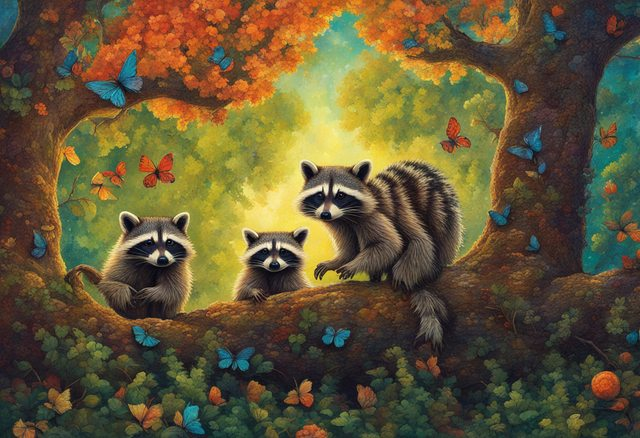

In [38]:
#% markdown
my $img3 = WWW::OpenAI::ChatCompletions::encode-image($*HOME ~ '/Downloads/ThreeHunters.jpg');
"![]($img3)"

**Remark:** The "three hunters" image is a [resource file](https://github.com/antononcube/Raku-WWW-OpenAI/blob/main/resources/ThreeHunters.jpg) of "WWW::OpenAI", [AAp1].

### Image narration

Here is an image narration example with the two images above, again, one specified with a URL, the other with a file path:

In [27]:

my $url1 = 'https://i.imgur.com/LEGfCeql.jpg';
my $fname2 = $*HOME ~ '/Downloads/ThreeHunters.jpg';
my @images = [$url1, $fname2];

openai-completion("Give concise descriptions of the images.", :@images, max-tokens => 900, format => 'values');

1. The first image features a single raccoon perched on a tree branch surrounded by a multitude of colorful butterflies in an array of blues and oranges, set against a vibrant, nature-themed backdrop.

2. The second image depicts three raccoons on a tree branch in a forest setting, with two of them looking towards the viewer and one looking to the side. The background is filled with autumnal-colored leaves and numerous butterflies that match the whimsical atmosphere of the scene.

### Description of mind-map

Here is a more Raku-developer application -- getting a description of technical diagram or flowchart. 
Well, in this case a mind-map from [AA1]:

![](https://i.imgur.com/kcUcWnql.jpeg)

In [93]:
#% markdown

my $mm-descr = 
    openai-completion(
        "How many branches this mind-map has? Describe each branch separately. Use relevant emoji prefixes.", 
        images => 'https://imgur.com/kcUcWnq.jpeg', 
        max-tokens => 1024,
        format => 'values'
    );

$mm-descr

The mind-map has five branches, each representing a different aspect or functionality related to LLM (Large Language Models) services access. Here's the description of each branch with relevant emoji prefixes:

1. 🎨 **DALL-E**: This branch indicates that DALL-E, an AI system capable of creating images from textual descriptions, is related to or a part of LLM services.

2. 🤖 **ChatGPT**: This branch suggests that ChatGPT, which is likely a conversational AI based on GPT (Generative Pre-trained Transformer), is associated with LLM services.

3. 🧠 **PaLM**: This branch points to PaLM, suggesting that it is another model or technology related to LLM services. PaLM might stand for a specific model or framework in the context of language processing.

4. 💬 **LLM chat objects**: This branch leads to a node indicating chat-related objects or functionalities that are part of LLM services.

5. 📚 **Chatbooks**: This branch leads to a concept called "Chatbooks," which might imply a feature or application related to creating books from chat or conversational content using LLM services.

Each of these branches emanates from the central node labeled "LLM services access," indicating that they are all different access points or functionalities within the realm of large language model services.

In [104]:
my $mmd-chart = llm-synthesize(["Make the corresponding Mermaid-JS diagram code for the following description. Give the code only, without Markdown symbols.", $mm-descr], e=>'ChatGPT')

graph LR
A[LLM services access] 
B[DALL-E]-->A 
C[ChatGPT]-->A 
D[PaLM]-->A 
E[LLM chat objects]-->A 
F[Chatbooks]-->A

Here is a diagram made with Mermaid-JS spec obtained above using a function of "WWW::MermaidInk", [AAp4]:

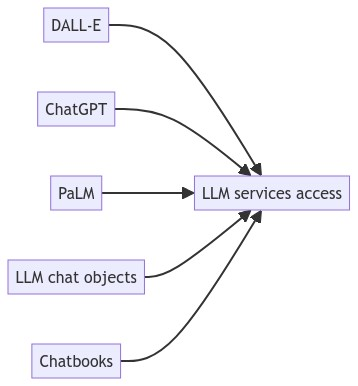

In [105]:
#% markdown 
mermaid-ink($mmd-chart, format=>'md-image')

**Remark:** In a Jupyter chatbook, [AAp3], Mermaid-JS diagrams can be "directly" visualized with notebook cells that have the magic `mermaid`. 
Below is given an example with on of LLM results for making Mermaid-JS diagram over the "vision-derived" mind-map description.

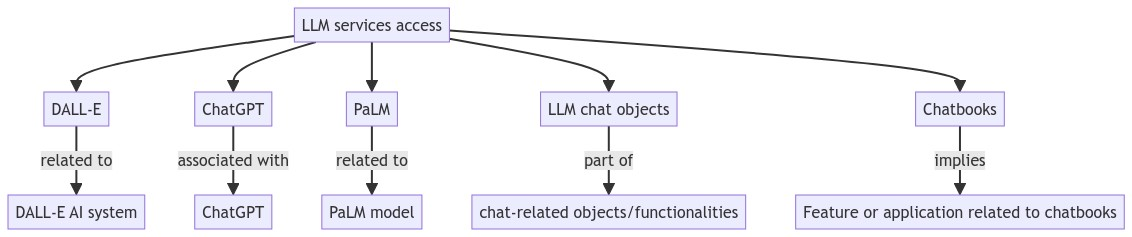

In [101]:
#% markdown 
mermaid-ink('
graph TB
    A[LLM services access] --> B[DALL-E]
    A --> C[ChatGPT]
    A --> D[PaLM]
    A --> E[LLM chat objects]
    A --> F[Chatbooks]
    B -->|related to| G[DALL-E AI system]
    C -->|associated with| H[ChatGPT]
    D -->|related to| I[PaLM model]
    E -->|part of| J[chat-related objects/functionalities]
    F -->|implies| K[Feature or application related to chatbooks]
', format => 'md-image')

Here is example code generation based on the "vision derived" mind-map description above:

In [119]:
#% markdown
llm-synthesize([
    "Generate Raku code -- using Markdown markings -- with an object oriented hierarchy corresponding to the description:\n", 
    $mm-descr], 
    e=>'ChatGPT')

```raku
class LLM::ServiceAccess {
    has DALLE $.dalle;
    has ChatGPT $.chatgpt;
    has PaLM $.palm;
    has LLMChatObjects $.llm-chat-objects;
    has Chatbooks $.chatbooks;
}

class DALLE {
    # Implementation for DALL-E functionality
}

class ChatGPT {
    # Implementation for ChatGPT functionality
}

class PaLM {
    # Implementation for PaLM functionality
}

class LLMChatObjects {
    # Implementation for LLM chat objects
}

class Chatbooks {
    # Implementation for Chatbooks functionality
}

# Usage
my $llm-service-access = LLM::ServiceAccess.new(
    dalle => DALLE.new,
    chatgpt => ChatGPT.new,
    palm => PaLM.new,
    llm-chat-objects => LLMChatObjects.new,
    chatbooks => Chatbooks.new,
);
```


------

## Programmatic

Let us show programmatic utilization of the vision capabilities.

Here is the workflow:

1. Ingest an image file and encode into a Base64 string
2. Make an LLM configuration with that image string (and corresponding model)
3. Synthesize a response to a basic request (like, image description)
   - Using `llm-synthesize`.
4. Make an LLM function for asking different questions over image
5. Ask questions and verify results
   - *Numerical questions are often wrong.*

### Image ingestion and encoding

Here we ingest the image and display it:

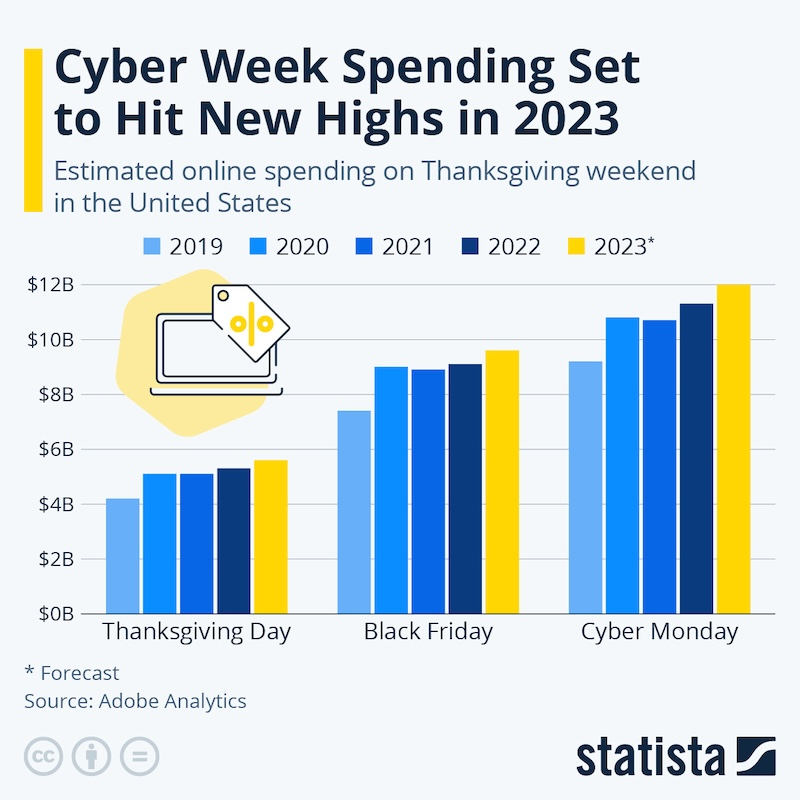

In [6]:
#%markdown
my $imgBarChart = WWW::OpenAI::ChatCompletions::encode-image($*HOME ~ '/Downloads/Cyber-Week-Spending-Set-to-Hit-New-Highs-in-2023-small.jpeg');
"![]($imgBarChart)"

**Remark:** The image was downloaded from the post ["Cyber Week Spending Set to Hit New Highs in 2023"](https://www.statista.com/chart/7045/thanksgiving-weekend-e-commerce-sales/).

### Configuration and synthesis

Here we make a suitable LLM configuration with the image:

In [15]:
my $confImg = llm-configuration("ChatGPT", model => 'gpt-4-vision-preview', images => $imgBarChart, temperature => 0.2);
$confImg.WHAT

(Configuration)

Here we synthesize a response of a image description request:

In [17]:
llm-synthesize("Describe the image.", e=> $confImg)

The image is an infographic titled "Cyber Week Spending Set to Hit New Highs in 2023." It presents a bar chart showing the estimated online spending on Thanksgiving weekend in the United States for the years 2019, 2020, 2021, 2022, and a forecast for 2023. The spending is broken down by three days: Thanksgiving Day, Black Friday, and Cyber Monday.

Each year is represented by a different color on the chart: 2019 is light blue, 2020 is dark blue, 2021 is even darker blue, 2022 is the darkest blue, and the forecast for 2023 is shown in yellow. The vertical axis of the chart measures spending in billions of dollars, ranging from $0B to $12B.

The chart indicates that spending has been increasing each year and is expected to reach new highs in 2023. For each of the three days, the bars rise in height from 2019 to the forecast for 2023, suggesting a steady growth in online spending during this period.

In the bottom left corner, there is a symbol indicating that the source of the data is Ad

### LLM function and repeated questioning

Here we define an LLM function that allows the multiple question request invocations over the image: 

In [20]:
my &fst = llm-function({"For the given image answer the question: $_ . Be as concise as possible in your answers."}, e => $confImg); 

-> **@args, *%args { #`(Block|3507283311664) ... }

In [21]:
&fst('How many years of presented in that image?')

Five years are presented in the image.

In [22]:
&fst('Which year has the highest value? What is that value?')

The year with the highest value is 2023, with a value of just over $11 billion.

**Remark:** Numerical value readings over technical plots or charts seem to be often wrong. OpenAI's vision model warns about this in the responses often enough.

______

## Dedicated notebook cells

In the context of the "recently-established" notebook solution "Jupyter::Chatbook", [AAp3], I am contemplating an extension to integrate OpenAI's vision service. 

The main challenges here include determining how users will specify images in the notebook, such as through URLs, file names, or Base64 strings, each with unique considerations. Additionally, I am exploring how best to enable users to input prompts or requests for image processing by the AI/LLM service. 

This integration, while valuable, it is not my immediate focus as there are programmatic ways to access OpenAI's vision service already. (See the previous section.)

-------

## Combinations (fairytale generation)

Consider the following computational workflow for making fairytales:

1. Draw or LLM-generate a few images that characterize parts of a story.
2. Narrate the images using the LLM "vision" functionality.
3. Use an LLM to generate a story over the narrations

**Remark:** Multi-modal LLM/AI systems already combine steps 2 and 3.

**Remark:** The workflow above (after it is programmed) can be executed multiple times until satisfactory results are obtained.

Image generation with DALL-E:

In [125]:
my @story-images = [
"a girl gets a basket with wine and food for her grandma.",
"a big bear meets a girl carrying a basket in the forest.",
"a girl that gives food from a basket to a big bear.",
"a big bear builds a new house for girl's grandma."
].map({ openai-create-image( 'Painting in the style of John Bauer of ' ~ $_, response-format => 'b64_json', format => 'values') });

@story-images.elems

4

Here we display the images:

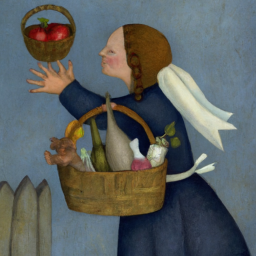

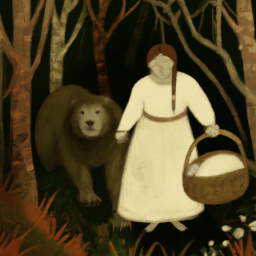

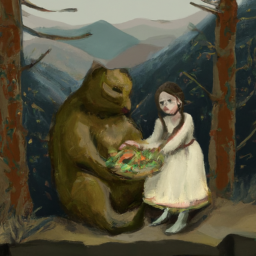

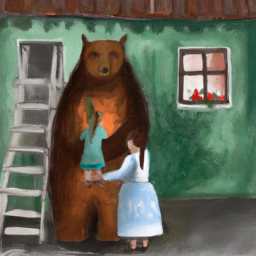

In [126]:
#% markdown
@story-images.map({ '![](data:image/jpeg;base64,' ~ $_ ~ ')' }).join("\n\n")

Here we get the image narrations (via the "AI vision service"):

In [127]:
my $story-images-descriptions = 
    openai-completion("Describe the images.",
        images => @story-images.map({ 'data:image/jpeg;base64,' ~ $_ ~ '' }).List,
        max-tokens => 900,
        format => 'values'
    );

$story-images-descriptions 

These images depict scenes that seem to be inspired by folklore or fairy tales, featuring human characters interacting with bears in various settings.

1. The first image shows a person with stylized features, wearing a dark blue dress and a white scarf, holding a red bowl with apples on top of their hand. They are also carrying a large basket filled with various items including a chicken, a bottle, and fruits or vegetables. The person is standing beside a wooden picket fence under a blue sky.

2. The second image shows a person in a white dress, holding a basket, standing in a dark forest next to a large bear. The setting is quite moody, with dark trees and foliage surrounding them, and the bear is looking at the person while they seem to be walking together.

3. The third image depicts a young person in a white dress with a colorful hem, sitting on a rock and sharing a plate of food with a large bear in a forested mountainous landscape. The bear is sitting opposite the person, and th

Here we extract the descriptions only:

In [128]:
#% markdown
my @descr = $story-images-descriptions.split("\n", :skip-empty)[1..4];
@descr ==> to-html()

<ul><li>1. The first image shows a person with stylized features, wearing a dark blue dress and a white scarf, holding a red bowl with apples on top of their hand. They are also carrying a large basket filled with various items including a chicken, a bottle, and fruits or vegetables. The person is standing beside a wooden picket fence under a blue sky.</li><li>2. The second image shows a person in a white dress, holding a basket, standing in a dark forest next to a large bear. The setting is quite moody, with dark trees and foliage surrounding them, and the bear is looking at the person while they seem to be walking together.</li><li>3. The third image depicts a young person in a white dress with a colorful hem, sitting on a rock and sharing a plate of food with a large bear in a forested mountainous landscape. The bear is sitting opposite the person, and they are both looking at the plate.</li><li>4. The fourth image illustrates a person in a white dress and blue apron, introducing a smaller human figure to a very large bear standing against the wall of a green house. There&#39;s an open window with red flowers and a ladder leaning against the house. The bear&#39;s posture suggests a calm and friendly interaction.</li></ul>

Here we generate the story from the descriptions above:

In [129]:
my $res = llm-synthesize(['Write a story that fits the following four descriptions:',|@descr], e=>llm-configuration('PaLM', max-tokens=>1200))

Once upon a time, there was a young woman named Anya who lived in a small village on the edge of a dark forest. Anya was a kind and gentle soul, and she loved animals. One day, Anya was walking through the forest when she came across a large bear. The bear was injured and in pain, and Anya felt sorry for it. She took the bear home with her and nursed it back to health.

As the bear healed, Anya and the bear became friends. The bear would often come to Anya's house for food and company, and the two would spend hours talking and playing together. Anya's friends and family were worried about her, but Anya didn't care. She knew that the bear was a gentle creature, and she loved it.

One day, a group of hunters came to the village. They were looking for the bear that had been terrorizing the countryside. Anya knew that the bear they were looking for was her friend, but she didn't want to see him hurt. She hid the bear in her house and told the hunters that she hadn't seen it.

The hunters w

-----

## References

### Articles

[AA1] Anton Antonov,
["Workflows with LLM functions"](https://rakuforprediction.wordpress.com/2023/08/01/workflows-with-llm-functions/),
(2023),
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).

[AA2] Anton Antonov,
["Re-programming to Python of LLM- and Chatbook packages"](https://rakuforprediction.wordpress.com/2023/10/15/re-programming-to-python-of-llm-and-chatbook-packages/),
(2023),
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).

[OAIb1] OpenAI team,
["New models and developer products announced at DevDay"](https://openai.com/blog/new-models-and-developer-products-announced-at-devday),
(2023),
[OpenAI/blog](https://openai.com/blog).

### Packages

[AAp1] Anton Antonov,
[WWW::OpenAI](https://github.com/antononcube/Raku-WWW-OpenAI) Raku package,
(2023),
[GitHub/antononcube](https://github.com/antononcube).


[AAp2] Anton Antonov,
[LLM::Functions](https://github.com/antononcube/Raku-LLM-Functions) Raku package,
(2023),
[GitHub/antononcube](https://github.com/antononcube).


[AAp3] Anton Antonov,
[Jupyter::Chatbook](https://github.com/antononcube/Raku-Jupyter-Chatbook) Raku package,
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[AAp4] Anton Antonov,
[WWW::MermaidInk](https://github.com/antononcube/Raku-WWW-MermaidInk) Raku package,
(2023),
[GitHub/antononcube](https://github.com/antononcube).


### Videos

[AAv1] Anton Antonov,
["Jupyter Chatbook LLM cells demo (Raku)"](https://www.youtube.com/watch?v=cICgnzYmQZg)
(2023),
[YouTube/@AAA4Prediction](https://www.youtube.com/@AAA4prediction).

[AAv2] Anton Antonov,
["Jupyter Chatbook multi cell LLM chats teaser (Raku)"](https://www.youtube.com/watch?v=wNpIGUAwZB8)
(2023),
[YouTube/@AAA4Prediction](https://www.youtube.com/@AAA4prediction).
